### Zadanie 14 z sekcji 3.7 (ISL)

This problem focuses on the *collinearity* problem.

**(a)** Perform the following commands in `Python`:

In [1]:
import numpy as np

rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?

In [2]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X = sm.add_constant(np.column_stack((x1, x2)))
print(X[:5])

model = sm.OLS(y, X)
model = model.fit()

# Print the coefficients
print("Regression coefficients: ", model.params)

[[1.         0.95600171 0.46935859]
 [1.         0.20768181 0.14250933]
 [1.         0.82844489 0.5876991 ]
 [1.         0.14928212 0.18114137]
 [1.         0.51280462 0.23645761]]
Regression coefficients:  [1.95790929 1.6153677  0.9427767 ]


**(b)** What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

Correlation between x1 and x2:  0.772324497691354


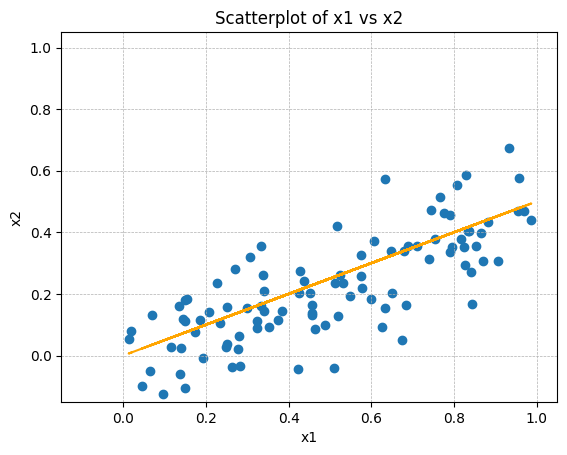

In [3]:
import matplotlib.pyplot as plt

# Calculate the correlation between x1 and x2
correlation = np.corrcoef(x1, x2)[0, 1]
print("Correlation between x1 and x2: ", correlation)

x2_without_noise = 0.5 * x1

# Create a scatterplot
plt.plot(x1, x2_without_noise, color='orange')
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.xlim(-0.15, 1.05)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('x2')
plt.ylim(-0.15, 1.05)
plt.title('Scatterplot of x1 vs x2')
plt.show()

![alt text](Correlation_examples2.svg)

**(c)** Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $β̂_0$ , $β̂_1$ , and $β̂_2$? How do these relate to the true $β_0$, $β_1$, and $β_2$? Can you reject the null hypothesis $H_0$ : $β_1 = 0$? How about the null hypothesis $H_0$ : $β_2 = 0$?

In [4]:
# Print the summary of the model
print(model.summary())
print()
print("p-value const ->", model.pvalues[0], )
print("p-value x1 ->\t", model.pvalues[1])
print("p-value x2 ->\t", model.pvalues[2])

# Print the coefficients
print()
print("^β0 = ", model.params[0], '\t|', "2 = β0")
print("^β1 = ", model.params[1], '\t|', "2 = β1")
print("^β2 = ", model.params[2], '\t|', "0.3 = β2")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           5.76e-08
Time:                        10:06:21   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

**(d)** Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis
$H_0$ : $β_1 = 0$?

In [5]:
# y = 2 + 2 * x1 + rng.normal(size=100)
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Add a constant (intercept) to the model
X_x1 = sm.add_constant(x1)

# Fit the model
model_x1 = sm.OLS(y, X_x1).fit()

# Print the summary of the model
print(model_x1.summary())

# Print the p-value for x1
print()
print("p-value const ->", model_x1.pvalues[0])
print("p-value x1 ->", model_x1.pvalues[1])

# Print the coefficients
print()
print("^β0 = ", model_x1.params[0], '\t|', "2 = β0")
print("^β1 = ", model_x1.params[1], '\t|', "2 = β1")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     71.21
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           2.91e-13
Time:                        10:06:21   Log-Likelihood:                -137.49
No. Observations:                 100   AIC:                             279.0
Df Residuals:                      98   BIC:                             284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5685      0.201      7.794      0.0

**(e)** Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0$ : $β_1 = 0$?

In [6]:
y = 2 + 0.3 * x2 + rng.normal(size=100)
# Add a constant (intercept) to the model
X_x2 = sm.add_constant(x2)

# Fit the model
model_x2 = sm.OLS(y, X_x2).fit()

# Print the summary of the model
print(model_x2.summary())

# Print the p-value for x1
print()
print("p-value const ->", model_x2.pvalues[0])
print("p-value x2 ->", model_x2.pvalues[1])

# Print the coefficients
print()
print("^β0 = ", model_x2.params[0], '\t|', "2 = β0")
print("^β1 = ", model_x2.params[1], '\t|', "0.3 = β1")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05064
Date:                Fri, 29 Nov 2024   Prob (F-statistic):              0.822
Time:                        10:06:21   Log-Likelihood:                -148.55
No. Observations:                 100   AIC:                             301.1
Df Residuals:                      98   BIC:                             306.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0751      0.176     11.822      0.0

**(f)** Do the results obtained in **(c)**–**(e)** contradict each other? Explain your answer.

**(g)** Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate()` to add this additional observation to each of `x1`, `x2` and `y`.

In [7]:
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

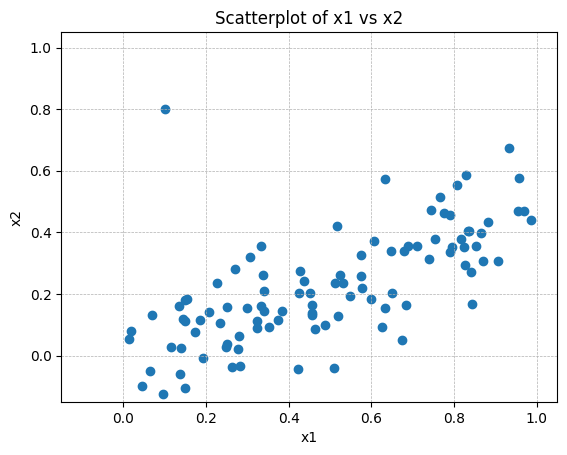

In [8]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.xlim(-0.15, 1.05)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('x2')
plt.ylim(-0.15, 1.05)
plt.title('Scatterplot of x1 vs x2')
plt.show()

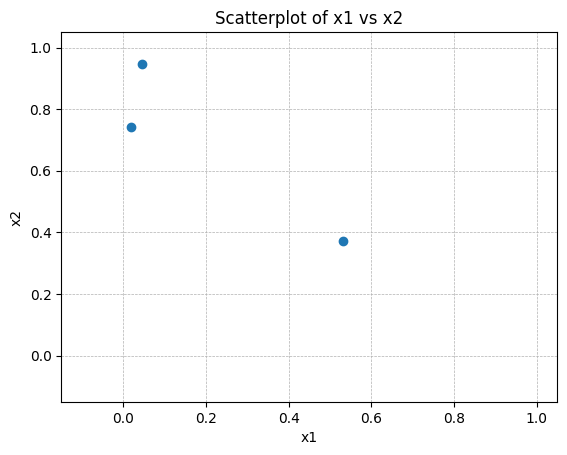

In [9]:
plt.scatter(x1, y)
plt.xlabel('x1')
plt.xlim(-0.15, 1.05)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('x2')
plt.ylim(-0.15, 1.05)
plt.title('Scatterplot of x1 vs x2')
plt.show()

Re-fit the linear models from **(c)** to **(e)** using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [76]:
# Re-fit the model from (c) using both x1 and x2
X_new = sm.add_constant(np.column_stack((x1, x2)))
model_new = sm.OLS(y, X_new).fit()

# Print the summary of the new model
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     37.00
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.07e-12
Time:                        15:40:51   Log-Likelihood:                -140.21
No. Observations:                 101   AIC:                             286.4
Df Residuals:                      98   BIC:                             294.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7006      0.202      8.423      0.0

In [77]:
# Re-fit the model from (d) using only x1
X_x1_new = sm.add_constant(x1)
model_x1_new = sm.OLS(y, X_x1_new).fit()

# Print the summary of the new model
print(model_x1_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     53.63
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           6.56e-11
Time:                        15:40:51   Log-Likelihood:                -146.75
No. Observations:                 101   AIC:                             297.5
Df Residuals:                      99   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7152      0.214      8.004      0.0

In [78]:
# Re-fit the model from (e) using only x2
X_x2_new = sm.add_constant(x2)
model_x2_new = sm.OLS(y, X_x2_new).fit()

# Print the summary of the new model
print(model_x2_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.25
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.46e-11
Time:                        15:40:51   Log-Likelihood:                -145.25
No. Observations:                 101   AIC:                             294.5
Df Residuals:                      99   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1076      0.164     12.832      0.0